<a href="https://colab.research.google.com/github/lucasantuneso/PUC-MVP/blob/main/mvp_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Telco Customer Churn

## Aluno. Lucas Antunes de Oliveira

### Sprint: Machine Learning & Analytics

# 1. Definição do Problema
<li>O dataset utilizado neste projeto é proveniente do Kaggle e está disponível no seguinte link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
</li>


1. **Descrição do Problema:**
   
O problema abordado neste projeto é crucial para empresas de telecomunicações, pois envolve a retenção de clientes. A capacidade de prever se um cliente irá cancelar o serviço (churn) é de extrema importância, uma vez que a perda de clientes pode representar uma grande perda financeira para a empresa. Portanto, o objetivo é desenvolver um modelo preditivo que seja capaz de identificar os clientes com maior probabilidade de churn, permitindo que a empresa tome medidas proativas para retê-los.

Além disso, entender os principais fatores que influenciam o churn dos clientes é fundamental para a formulação de estratégias eficazes de retenção. Portanto, além de prever o churn, também é importante identificar os principais componentes que contribuem para essa decisão dos clientes.

Com base nessas informações, o projeto visa explorar e analisar um conjunto de dados fornecido, que contém informações sobre clientes de uma empresa de telecomunicações. O conjunto de dados inclui uma variedade de atributos, como informações demográficas dos clientes, detalhes dos serviços contratados, histórico de pagamento e informações contratuais. O objetivo é utilizar esses atributos para construir um modelo preditivo que possa prever o churn dos clientes e identificar os principais fatores que influenciam essa decisão.

Portanto, o desafio principal é desenvolver um modelo de machine learning que seja capaz de prever com precisão o churn dos clientes e identificar os fatores mais importantes que contribuem para essa decisão. Isso permitirá que a empresa tome medidas proativas para reter seus clientes e, consequentemente, melhorar sua lucratividade e satisfação do cliente.

2. **Premissas ou Hipóteses:**
   - A satisfação do cliente pode influenciar diretamente a taxa de churn.
   - Certos serviços contratados podem ter maior impacto na decisão de um cliente cancelar o serviço.
   - Clientes com contratos mais longos têm menor probabilidade de cancelar o serviço.
   
3. **Restrições ou Condições para Selecionar os Dados:**
   Os dados foram selecionados com base nas informações dos clientes que deixaram a empresa nos últimos meses. Atributos como tipo de contrato, método de pagamento, encargos mensais e totais, e serviços contratados foram considerados para análise.

4. **Descrição do Dataset:**
   - **customerID:** Identificação do cliente.
   - **gender:** Gênero do cliente (masculino ou feminino).
   - **SeniorCitizen:** Indica se o cliente é um idoso (1 para sim, 0 para não).
   - **Partner:** Indica se o cliente tem um parceiro (sim, não).
   - **Dependents:** Indica se o cliente tem dependentes (sim, não).
   - **tenure:** Número de meses que o cliente permaneceu na empresa.
   - **PhoneService:** Indica se o cliente possui serviço de telefone (sim, não).
   - **MultipleLines:** Indica se o cliente possui várias linhas de telefone (sim, não, sem serviço telefônico).
   - **InternetService:** Provedor de serviço de internet do cliente (DSL, Fibra óptica, Não).
   - **OnlineSecurity:** Indica se o cliente possui segurança online (sim, não, sem serviço de internet).
   - **OnlineBackup:** Indica se o cliente possui backup online (sim, não, sem serviço de internet).
   - **DeviceProtection:** Indica se o cliente possui proteção de dispositivo (sim, não, sem serviço de internet).
   - **TechSupport:** Indica se o cliente possui suporte técnico (sim, não, sem serviço de internet).
   - **StreamingTV:** Indica se o cliente possui serviço de streaming de TV (sim, não, sem serviço de internet).
   - **StreamingMovies:** Indica se o cliente possui serviço de streaming de filmes (sim, não, sem serviço de internet).
   - **Contract:** Indica o tipo de contrato do cliente (Mensal, Anual, Bienal).
   - **PaperlessBilling:** Indica se o cliente possui faturamento sem papel (sim, não).
   - **PaymentMethod:** Indica o método de pagamento do cliente (Cheque eletrônico, Cheque enviado pelo correio, Transferência bancária (automática), Cartão de crédito (automático)).
   - **MonthlyCharges:** Indica o custo mensal atual da assinatura do cliente.
   - **TotalCharges:** Indica o total de cobranças pagas pelo cliente até o momento.
   - **Churn:** Indica se o cliente cancelou o serviço (sim, não).

In [1]:
# Instalação do CatBoost via pip
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00


In [2]:
# Para manipulação e análise de dados
import pandas as pd
import numpy as np

# Para visualização de dados estatísticos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # Para visualização interativa de dados

# Para cálculo estatístico e matemático
from scipy.stats import zscore  # Para cálculo de escore Z
from statistics import stdev    # Para cálculo do desvio padrão

# Para interface gráfica do usuário
import tkinter

# Para pré-processamento de dados
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# Para validação cruzada e divisão de dados
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Para contar elementos em uma lista
from collections import Counter

# Para transformar colunas de um dataframe
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

# Para classificação e regressão
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

# Para modelos Naive Bayes
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB

# Para tratamento de dados desbalanceados
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImblearnPipeline

# Para modelos específicos
from catboost import CatBoostClassifier  # Para modelos CatBoost
from xgboost import XGBClassifier        # Para modelos XGBoost

# Para avaliação de desempenho do modelo
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay, auc

# Pipeline de processamento (ajuste para não duplicar com sklearn.pipeline)
from sklearn.pipeline import Pipeline

# Importações adicionais para análise de desempenho e salvamento de modelos
import joblib

In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

##2. Preparação de Dados

#2.1 Carga de Dados:
- Nesta etapa de carga de dados, utilizaremos o pacote Pandas para carregar um arquivo .csv sem cabeçalho disponível online. Após carregar o conjunto de dados, realizaremos uma breve exploração inicial para entender sua estrutura e conteúdo.

In [4]:
# Carregar os dados
url= 'https://raw.githubusercontent.com/lucasantuneso/PUC-MVP/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [5]:
# Visualização das primeiras linhas do DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##2.2 Análise Exploratória de Dados (AED):

In [6]:
# Verificar as informações básicas do dataset (info)
print("Informações básicas do dataset:")
print(df.info())

Informações básicas do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

Essas informações básicas do dataset mostram que o dataset é composto por 7043 entradas e 21 colunas. A maioria das colunas é do tipo 'object', indicando que contêm dados categóricos. No entanto, também há colunas do tipo 'int64' e 'float64', que sugerem a presença de dados numéricos. A coluna 'TotalCharges' chama atenção por ser do tipo 'object'.

In [7]:
# Converte a coluna 'TotalCharges' para string e remove espaços em branco.
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()

# Converte a coluna 'TotalCharges' para numérico, transformando valores não numéricos em NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Substitui valores NaN em 'TotalCharges' pela mediana dos valores não NaN da coluna.
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [8]:
# Visualizar as primeiras entradas do dataset (head)
print("\nPrimeiras entradas do dataset:")
print(df.head())


Primeiras entradas do dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stre

In [9]:
# Remove a coluna 'customerID'
df = df.drop('customerID', axis=1)

In [10]:
# Remove linhas onde 'Churn' é Na
df = df.dropna(subset=['Churn'])

In [11]:
# Remoção de duplicatas e verificação
print('Número de valores duplicados antes da remoção:', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Valores duplicados removidos com sucesso")

Número de valores duplicados antes da remoção: 22
Valores duplicados removidos com sucesso


In [12]:
# Definindo as colunas numéricas com base no número de valores únicos
numeric_columns = [col for col in df.columns if len(df[col].unique()) > 6]
print(numeric_columns)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [13]:
# Gerando estatísticas descritivas para as colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
print(df[numeric_columns].describe())


Estatísticas descritivas para colunas numéricas:
            tenure  MonthlyCharges  TotalCharges
count  7021.000000     7021.000000   7021.000000
mean     32.469449       64.851894   2288.954490
std      24.534965       30.069001   2265.319449
min       0.000000       18.250000     18.800000
25%       9.000000       35.750000    411.150000
50%      29.000000       70.400000   1400.550000
75%      55.000000       89.900000   3801.700000
max      72.000000      118.750000   8684.800000


Na etapa de carga de dados (2.1), foi possível analisar que:

- O dataset possui 7043 entradas e 21 colunas.
- As colunas são do tipo:
- 1 coluna float64
- 2 colunas int64
- 18 colunas object
- Não há valores nulos em nenhuma das colunas.

O dataset inclui informações sobre clientes de uma empresa de telecomunicações, como gênero, se são idosos, se possuem parceiro e dependentes, tempo de permanência, serviços contratados, tipo de contrato, método de pagamento, custos mensais e totais, e se houve cancelamento do serviço (Churn).
Além disso, são apresentadas estatísticas descritivas das variáveis numéricas, como SeniorCitizen, tenure e MonthlyCharges.

Após isso, há um processo para tratar valores ausentes e duplicados, bem como para converter a coluna 'TotalCharges' de object para float64. Em seguida, são identificadas e classificadas as colunas do dataframe como categóricas ou numéricas.

##2.3 Análise exploratória adicionais:
- Este segmento adicional da análise exploratória se concentra em visualizações específicas para aprofundar a compreensão dos dados. Serão examinadas distribuições de churn com base em diferentes variáveis, como gênero, idade, presença de dependentes, tipos de serviço, tipo de contrato, método de pagamento e custos mensais. Essas análises visam identificar padrões e tendências nos dados que possam fornecer insights valiosos sobre os fatores que influenciam o churn dos clientes.

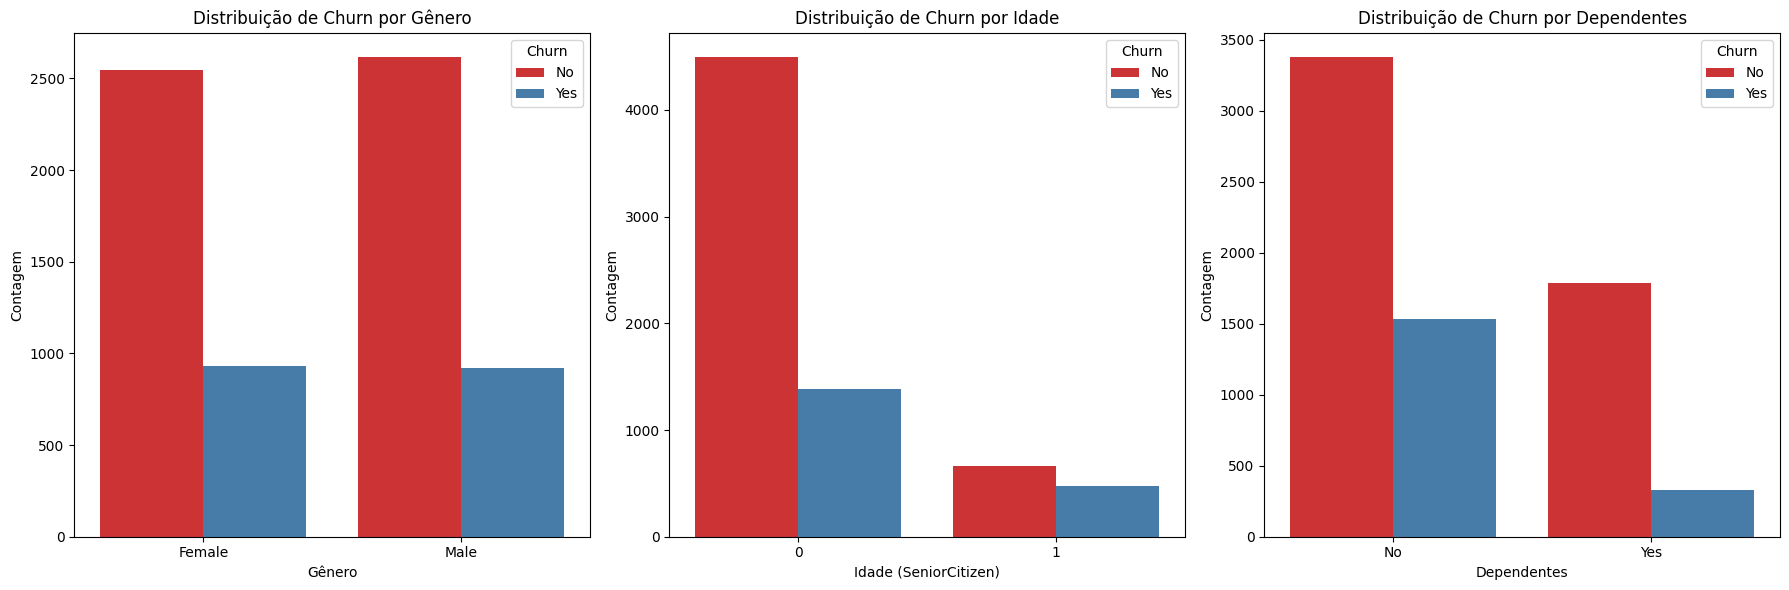

In [14]:
# Gráfico triplo de Distribuição de Churn por Gênero, Idade e Dependentes
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set1')
plt.title('Distribuição de Churn por Idade')
plt.xlabel('Idade (SeniorCitizen)')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set1')
plt.title('Distribuição de Churn por Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

1. **Distribuição por Gênero**:
   - O gráfico mostra a contagem de clientes churn e não churn para cada gênero.
   - Há um ligeiro desequilíbrio na distribuição de gênero, com um pouco mais de clientes do sexo masculino, mas a diferença não é significativa.
   - Ambos os gêneros têm valores de churn próximos, sugerindo que o gênero por si só pode não ser um fator determinante para o churn.

2. **Distribuição de Idade**:
   - A análise mostra a distribuição de churn em relação à idade dos clientes, distinguindo entre clientes idosos e não idosos (SeniorCitizen).
   - Há uma grande diferença entre o número de clientes idosos e não idosos.
   - Para clientes não idosos, a contagem de não churn é significativamente maior do que a de churn, indicando uma taxa de churn relativamente baixa entre esses clientes.
   - No entanto, para clientes idosos, embora a contagem de churn seja menor do que a de não churn, a diferença não é tão acentuada, sugerindo que os clientes idosos têm uma taxa de churn mais significativa em comparação com os não idosos.

3. **Distribuição de Churn por Dependentes**:
   - A distribuição de churn é examinada com base na presença ou ausência de dependentes.
   - Para clientes sem dependentes, a contagem de churn é maior em comparação com os clientes com dependentes, indicando uma relação entre a falta de dependentes e uma maior probabilidade de churn.
   - No entanto, a diferença entre churn e não churn é mais acentuada para clientes sem dependentes em comparação com aqueles com dependentes.

Essas análises sugerem que a idade e a presença de dependentes podem ser fatores significativos na determinação do churn, enquanto o gênero pode ter uma influência menor. Isso pode ser útil para direcionar estratégias de retenção de clientes e personalização de serviços com base nessas características.

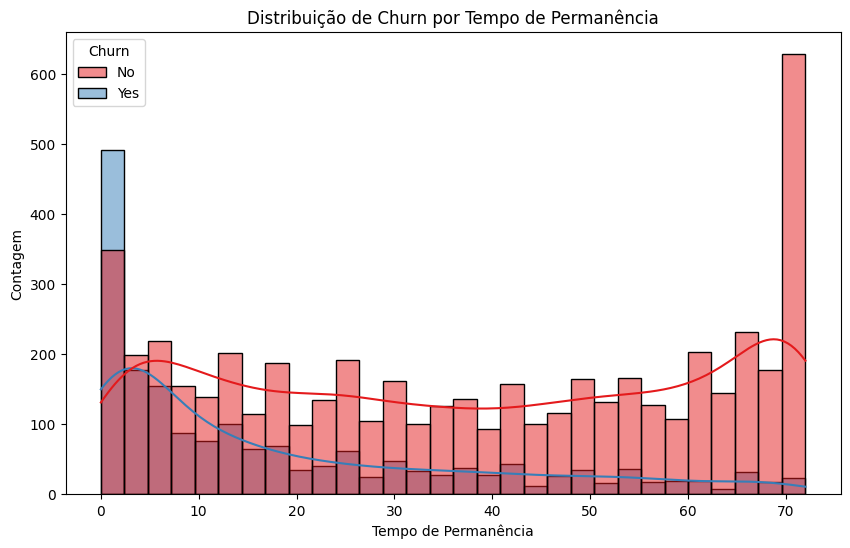

In [15]:
plt.figure(figsize=(10, 6))
plot = sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='Set1', bins=30)
plt.title('Distribuição de Churn por Tempo de Permanência')
plt.xlabel('Tempo de Permanência')
plt.ylabel('Contagem')

# Corrigindo problema de legenda pois 'Churn' está numérico
if not plot.legend_.get_texts():
    unique_churn = df['Churn'].unique()
    labels = [str(label) for label in unique_churn]
    plot.legend(title='Churn', labels=labels)

plt.show()

Este gráfico mostra a distribuição do churn em relação ao tempo de permanência dos clientes.

- **Eixo X (Tempo de Permanência)**: Vai de 0 até 70, representando o período de tempo em que os clientes permaneceram com o serviço.

- **Eixo Y (Contagem)**: Vai de 0 até aproximadamente 6000, representando a contagem de clientes.

- **Barras**: As barras representam a distribuição da contagem de clientes com base no tempo de permanência. A primeira barra, com cerca de 6000 clientes, indica que a maioria dos clientes está concentrada em um intervalo de tempo específico. A parte superior da barra é vermelha e a parte inferior é azul, indicando a proporção de churn (cancelamento de serviço) em cada intervalo de tempo.

- **Linhas vermelha e azul**: As linhas representam a densidade de distribuição do churn ao longo do tempo de permanência. A linha vermelha indica a densidade de churn, enquanto a linha azul representa a densidade de clientes que permaneceram com o serviço. A linha vermelha começa em torno de 170 e mantém-se relativamente constante, indicando uma taxa de churn constante ao longo do tempo. A linha azul começa em torno de 180 e diminui gradualmente, indicando que a maioria dos clientes que permanecem com o serviço tende a fazê-lo por um período mais longo.

Em resumo, este gráfico mostra como o churn varia com o tempo de permanência dos clientes, fornecendo insights sobre a relação entre a duração do relacionamento do cliente com o serviço e a probabilidade de cancelamento.

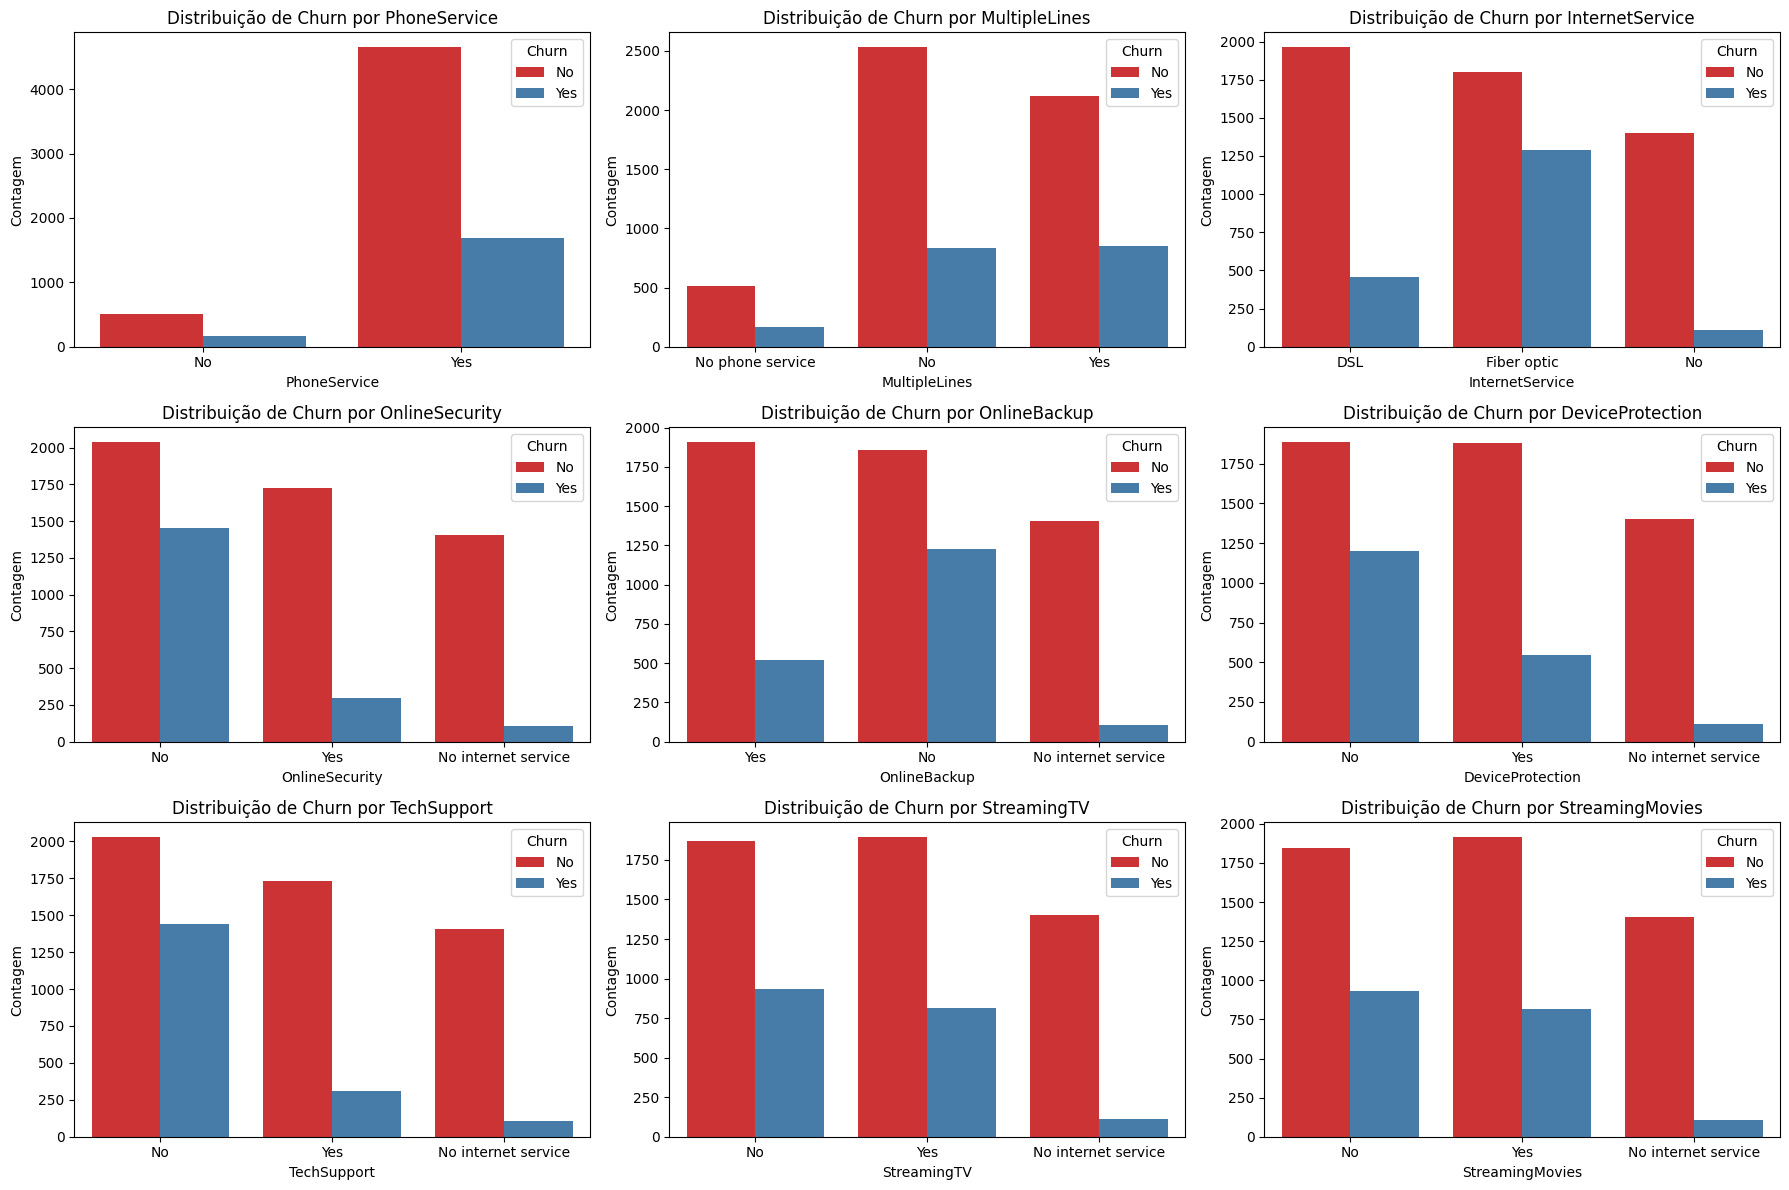

In [16]:
# Gráfico de Distribuição de Churn por Serviço
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(18, 12))
for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=service, hue='Churn', palette='Set1')
    plt.title(f'Distribuição de Churn por {service}')
    plt.xlabel(service)
    plt.ylabel('Contagem')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

Esse gráfico de distribuição de churn por serviço oferece uma visão detalhada de como o churn se relaciona com diferentes serviços prestados aos clientes.

1. **Distribuição de Churn por PhoneService**:
   - Os clientes com serviço de telefone têm uma contagem de churn menor do que os clientes sem serviço de telefone.
   - No entanto, a diferença na contagem de churn entre os clientes com e sem serviço de telefone é mais pronunciada entre os clientes sem serviço de telefone.

2. **Distribuição de Churn por MultipleLines**:
   - Os clientes com serviço de telefone único têm uma contagem de churn menor do que os clientes com múltiplas linhas.
   - A contagem de churn é comparativamente menor entre os clientes com múltiplas linhas, mas ainda é significativa.

3. **Distribuição de Churn por InternetService**:
   - Os clientes com serviço DSL têm uma contagem de churn menor em comparação com aqueles com serviço de fibra óptica ou sem serviço de internet.
   - A contagem de churn é significativamente maior entre os clientes com serviço de fibra óptica, seguido pelos clientes sem serviço de internet.

4. **Distribuição de Churn por OnlineSecurity**:
   - A presença de serviço de segurança online parece reduzir a contagem de churn entre os clientes.
   - Os clientes sem serviço de segurança online têm uma contagem de churn significativamente maior em comparação com aqueles com o serviço.

5. **Distribuição de Churn por OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies**:
   - A presença de serviços como backup online, proteção de dispositivo, suporte técnico, streaming de TV e streaming de filmes tende a reduzir a contagem de churn entre os clientes.
   - Os clientes sem esses serviços têm uma contagem de churn mais alta em comparação com aqueles que têm esses serviços.

Essas análises fornecem insights valiosos sobre como diferentes serviços afetam a probabilidade de churn dos clientes, destacando áreas em que a empresa pode precisar melhorar seus serviços ou fornecer incentivos para reter clientes.

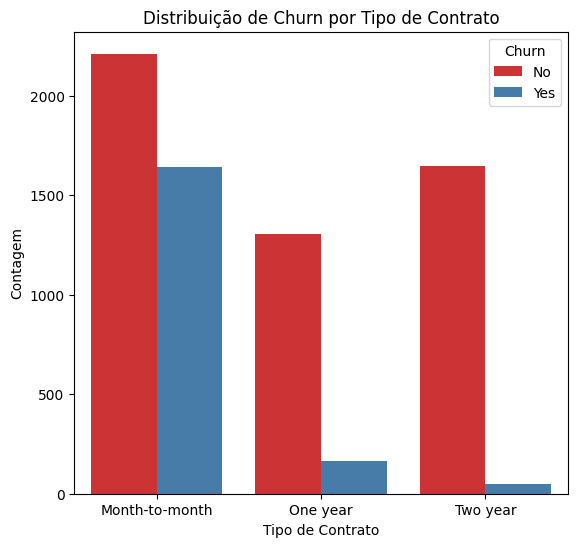

In [17]:
# Gráfico de Distribuição de Churn por Tipo de Contrato
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.legend(title='Churn', loc='upper right')

Este gráfico de barras mostra a distribuição do churn (cancelamento de serviço) em relação ao tipo de contrato dos clientes.

- **Month-to-month**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 2500 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 1600 casos.

- **One year**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 1300 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 200 casos.

- **Two years**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 1700 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 100 casos.

Essa visualização permite comparar a distribuição do churn entre os diferentes tipos de contrato. Nota-se que os contratos de "Month-to-month" têm uma taxa de churn significativamente maior em comparação com os contratos de "One year" e "Two years". Isso sugere que os clientes com contratos de curto prazo têm uma probabilidade maior de cancelar o serviço em comparação com os clientes com contratos de longo prazo.

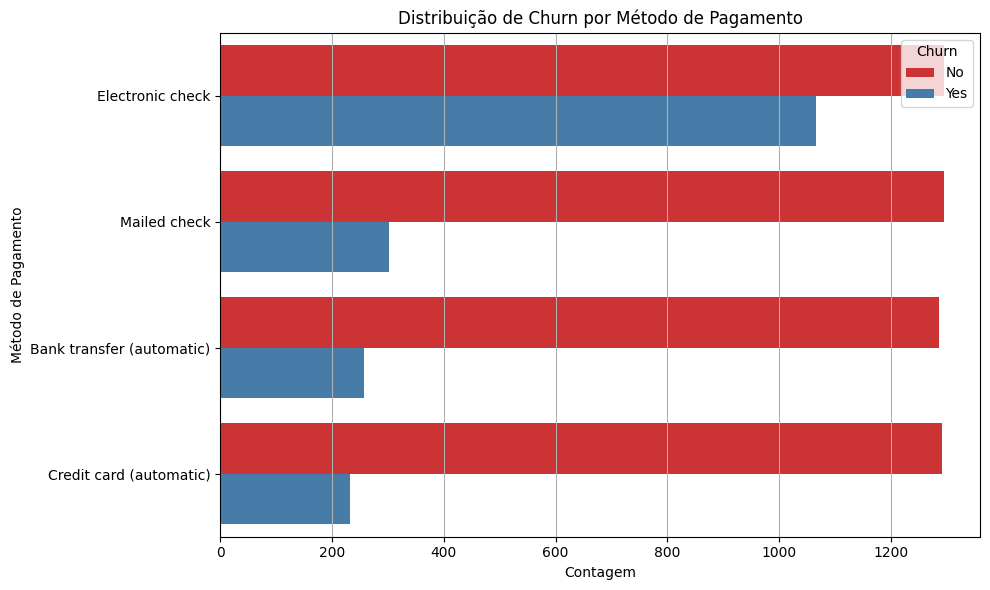

In [18]:
# Gráfico de Distribuição de Churn por Método de Pagamento
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
plt.title('Distribuição de Churn por Método de Pagamento')

sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette='Set1')

plt.xlabel('Contagem')
plt.ylabel('Método de Pagamento')
plt.legend(title='Churn', loc='upper right')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

O gráfico de barras mostra a distribuição do churn (cancelamento de serviço) em relação ao método de pagamento dos clientes.

- **Eletronic check**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 1500 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 100 casos.

- **Mailed check**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 1100 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 250 casos.

- **Bank transfer(automatic)**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 1100 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 200 casos.

- **Credit card**:
  - Para clientes que não cancelaram o serviço (No churn), há aproximadamente 1200 casos.
  - Para clientes que cancelaram o serviço (Yes churn), há aproximadamente 190 casos.

Essa visualização permite comparar a distribuição do churn entre os diferentes métodos de pagamento. Nota-se que o método de pagamento "Eletronic check" parece ter uma taxa de churn relativamente alta em comparação com os outros métodos, enquanto o método "Credit card" tem uma taxa de churn mais baixa. Isso sugere uma possível relação entre o método de pagamento e a probabilidade de churn, o que pode ser útil para estratégias de retenção de clientes.

Text(0, 0.5, 'Custos Mensais')

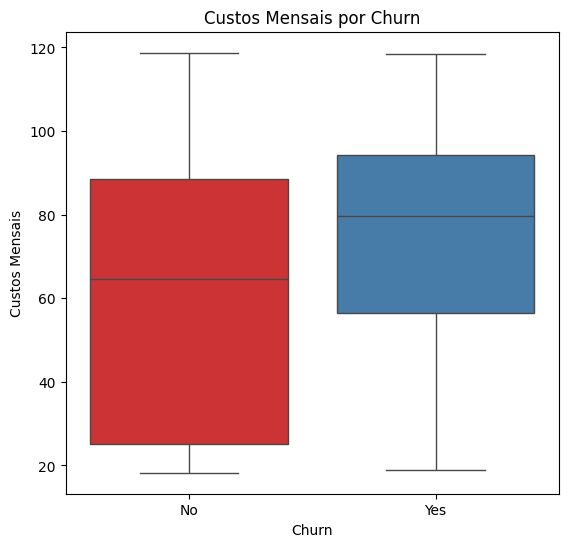

In [19]:
# Gráfico de Custos Mensais por Churn
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1')
plt.title('Custos Mensais por Churn')
plt.xlabel('Churn')
plt.ylabel('Custos Mensais')

O gráfico de boxplot mostra a distribuição dos custos mensais em relação ao churn dos clientes.

- **Clientes que não cancelaram o serviço (Churn = No)**:
  - A mediana (linha preta dentro da caixa) dos custos mensais está por volta de 65.
  - A caixa do boxplot representa o intervalo interquartil (IQR), onde a maioria dos dados está concentrada. No caso de "No churn", vai de aproximadamente 20 a 85.
  - As barras superiores e inferiores (whiskers) estendem-se para os valores extremos, excluindo outliers, e no caso de "No churn", os valores estão principalmente entre 20 e 85.

- **Clientes que cancelaram o serviço (Churn = Yes)**:
  - A mediana dos custos mensais está por volta de 78.
  - A caixa do boxplot vai de aproximadamente 55 a 90 para clientes com churn.
  - Os whiskers estendem-se até os valores extremos, excluindo outliers, e no caso de "Churn", os valores estão principalmente entre 55 e 90.

Essa visualização permite comparar a distribuição dos custos mensais entre clientes que cancelaram o serviço (churn) e aqueles que não cancelaram. Nota-se que, em geral, os custos mensais parecem ser maiores para os clientes que cancelaram o serviço em comparação com aqueles que permaneceram.

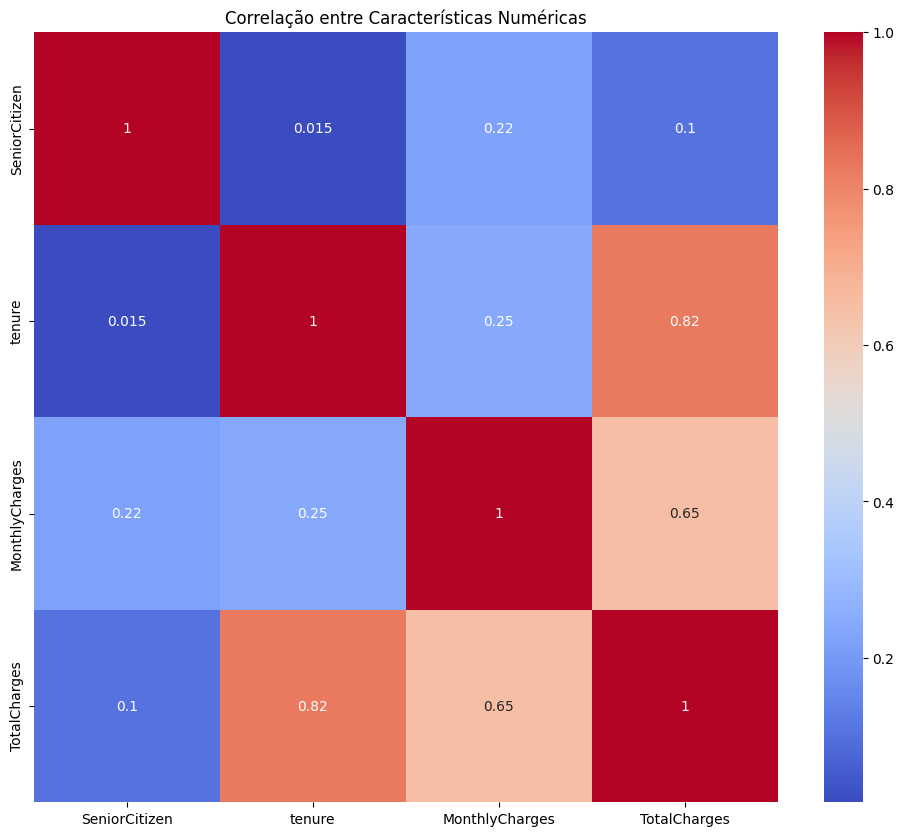

In [20]:
# Mapa de calor da Correlação entre Características numéricas
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Características Numéricas')
plt.show()

1. **SeniorCitizen**:
   - Correlação com SeniorCitizen: 1 (auto-correlação)
   - Correlação com Tenure: 0.015 (muito baixa)
   - Correlação com MonthlyCharges: 0.22 (baixa)
   - Correlação com TotalCharges: 0.1 (baixa)

2. **Tenure**:
   - Correlação com SeniorCitizen: 0.015 (muito baixa)
   - Correlação com Tenure: 1 (auto-correlação)
   - Correlação com MonthlyCharges: 0.25 (baixa)
   - Correlação com TotalCharges: 0.82 (alta)

3. **MonthlyCharges**:
   - Correlação com SeniorCitizen: 0.22 (baixa)
   - Correlação com Tenure: 0.25 (baixa)
   - Correlação com MonthlyCharges: 1 (auto-correlação)
   - Correlação com TotalCharges: 0.65 (moderada)

4. **TotalCharges**:
   - Correlação com SeniorCitizen: 0.1 (baixa)
   - Correlação com Tenure: 0.82 (alta)
   - Correlação com MonthlyCharges: 0.65 (moderada)
   - Correlação com TotalCharges: 1 (auto-correlação)

Esses valores de correlação indicam o grau e a direção da relação linear entre as características. Uma correlação próxima de 1 indica uma correlação positiva forte, enquanto uma correlação próxima de -1 indica uma correlação negativa forte. Uma correlação próxima de 0 indica uma correlação fraca ou inexistente.

Com base nessas interpretações:
- Existe uma correlação alta e positiva entre a variável **Tenure** (tempo de permanência) e **TotalCharges** (cargas totais), o que sugere que clientes com maior tempo de permanência tendem a ter maiores cargas totais.
- A correlação entre **MonthlyCharges** (encargos mensais) e **TotalCharges** também é moderada, indicando que clientes com encargos mensais mais altos tendem a ter maiores cargas totais.
- No entanto, a correlação entre **SeniorCitizen** e as outras características é relativamente baixa, o que sugere que a idade do cliente não está fortemente relacionada com o tempo de permanência ou encargos mensais.

#2.4 Pré-processamento de Dados
- Nesta seção, abordaremos o pré-processamento essencial dos dados, começando pela remoção de duplicatas para assegurar a precisão do conjunto de dados. Em seguida, converteremos variáveis categóricas e binárias para formatos numéricos usando mapeamento e One-Hot Encoding, e normalizaremos as características numéricas com StandardScaler. Finalizamos preparando um pipeline de pré-processamento que incorpora o balanceamento de classes com SMOTE, otimizando os dados para o treinamento eficaz dos modelos de machine learning.

Verificação de Duplicatas
Identificação e remoção de entradas duplicadas:

In [21]:
# Verificando novamento e tendo certeza que duplicatas foram removidas
print(f"Número inicial de entradas: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Número de entradas após remoção de duplicatas: {len(df)}")

Número inicial de entradas: 7021
Número de entradas após remoção de duplicatas: 7021


Conversão de Características Categóricas
Conversão de características binárias e categóricas:

In [22]:
# Mapeando variáveis binárias
binary_map = {'Yes': 1, 'No': 0}
df['Partner'] = df['Partner'].map(binary_map)
df['Dependents'] = df['Dependents'].map(binary_map)
df['PhoneService'] = df['PhoneService'].map(binary_map)
df['PaperlessBilling'] = df['PaperlessBilling'].map(binary_map)
df['Churn'] = df['Churn'].map(binary_map)

# Mapeamento para gênero
gender_map = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_map)

# Aplicação de One-Hot Encoding nas características categóricas restantes
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [23]:
# Convertendo as colunas
categorical_columns = ['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
                       'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
                       'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                       'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                       'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
                       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
                       'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
                       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df[categorical_columns] = df[categorical_columns].astype(int)

Normalização de Características Numéricas
Aplicação de escala padrão nas características numéricas:

In [24]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Configurando o transformador de colunas para normalização
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'  # Manter as outras colunas não transformadas
)

Preparação Final dos Dados
Construção do pipeline de pré-processamento com SMOTE para balanceamento de dados:

In [25]:
# Pipeline final para aplicar transformações e balanceamento
pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Preparando dados finais
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Detalhamento das Seleção de Características:

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Obter a importância das características
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Exibir as características mais importantes
print(importances.head())

                    feature  importance
8              TotalCharges    0.172569
7            MonthlyCharges    0.146830
4                    tenure    0.144019
33  Contract_Month-to-month    0.061291
24           TechSupport_No    0.033103


A saída exibida revela as cinco características mais importantes, como 'TotalCharges' e 'MonthlyCharges', indicando sua relevância no contexto do modelo.

#3. Modelagem e Treinamento:
Nesta seção, configuramos e treinamos diversos modelos de machine learning, como KNN, SVC e RandomForest, ajustando-os para atender às necessidades específicas do projeto. Cada modelo é avaliado com base em métricas de desempenho após o treinamento, utilizando técnicas de balanceamento e pré-processamento adequadas.


##3.1. Configuração dos Modelos:
Aqui definimos os modelos que serão utilizados no projeto, incluindo KNN, SVC, RandomForest, entre outros. Cada modelo é configurado com seus parâmetros específicos.

In [27]:
# Definição de Modelos e Parâmetros
models = {
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

parameters = {
    'KNN': {'n_neighbors': [5, 11, 21]},
    'SVC': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 500]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100]},
    'Gradient Boosting': {'n_estimators': [100, 200]}
}

##3.2. Treinamento e Avaliação dos Modelos


Nesta parte, treinamos e avaliamos cada modelo usando um pipeline que inclui pré-processamento, balanceamento com SMOTE e classificação. A performance é avaliada e exibida em uma matriz de confusão.

In [28]:
# Dicionário para armazenar métricas e modelos
model_metrics = {}
trained_models = {}

KNN Acurácia: 0.71
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1294
           1       0.47      0.75      0.58       462

    accuracy                           0.71      1756
   macro avg       0.68      0.72      0.68      1756
weighted avg       0.78      0.71      0.72      1756



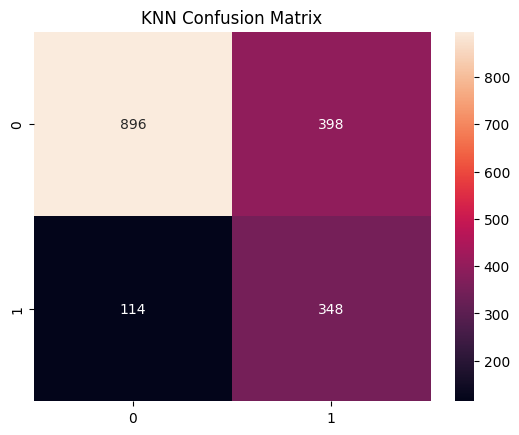

SVC Acurácia: 0.76
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1294
           1       0.54      0.74      0.62       462

    accuracy                           0.76      1756
   macro avg       0.72      0.76      0.73      1756
weighted avg       0.80      0.76      0.77      1756



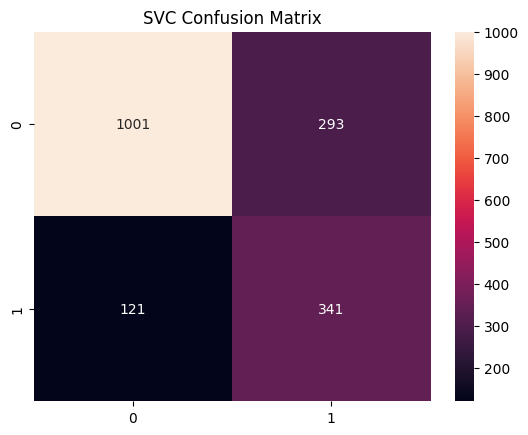

Random Forest Acurácia: 0.78
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1294
           1       0.58      0.56      0.57       462

    accuracy                           0.78      1756
   macro avg       0.71      0.71      0.71      1756
weighted avg       0.78      0.78      0.78      1756



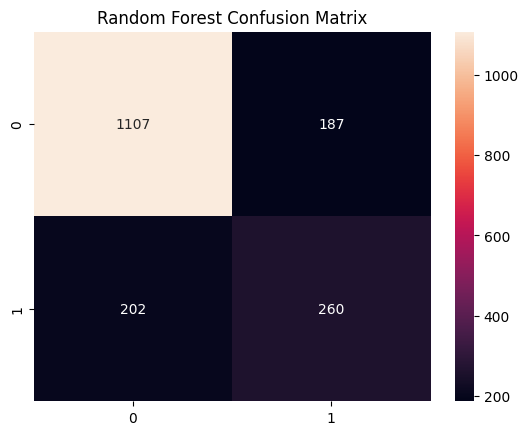

Logistic Regression Acurácia: 0.75
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1294
           1       0.51      0.79      0.62       462

    accuracy                           0.75      1756
   macro avg       0.71      0.76      0.72      1756
weighted avg       0.80      0.75      0.76      1756



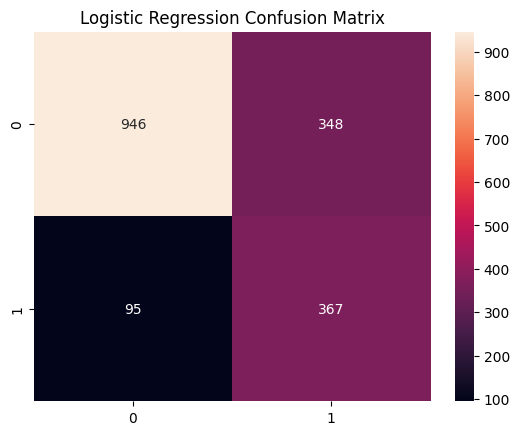

Decision Tree Acurácia: 0.74
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1294
           1       0.50      0.55      0.52       462

    accuracy                           0.74      1756
   macro avg       0.67      0.68      0.67      1756
weighted avg       0.75      0.74      0.74      1756



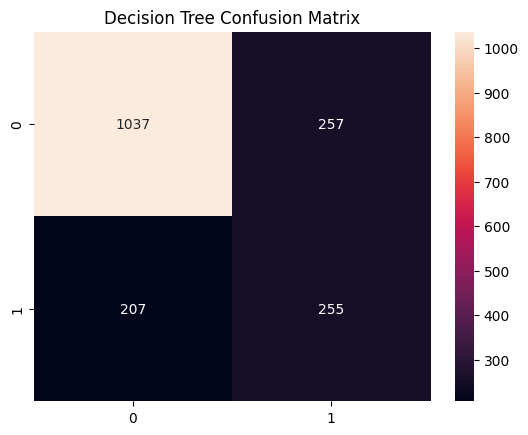

AdaBoost Acurácia: 0.77
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1294
           1       0.54      0.74      0.63       462

    accuracy                           0.77      1756
   macro avg       0.72      0.76      0.73      1756
weighted avg       0.80      0.77      0.78      1756



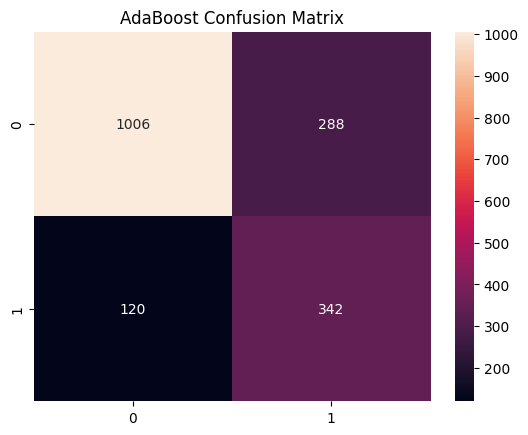

Gradient Boosting Acurácia: 0.78
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1294
           1       0.57      0.66      0.61       462

    accuracy                           0.78      1756
   macro avg       0.72      0.74      0.73      1756
weighted avg       0.79      0.78      0.78      1756



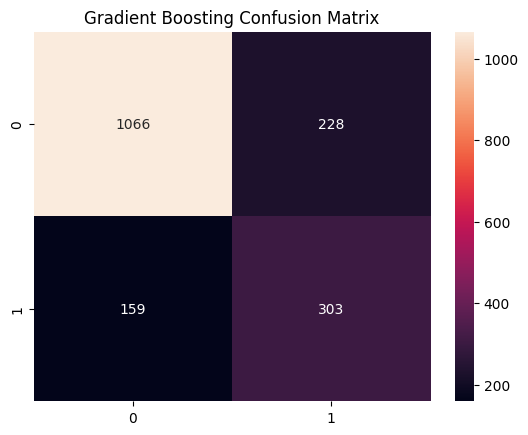

In [29]:
for name, model in models.items():
    model_pipeline = ImblearnPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Armazenando probabilidades ou decision function scores
    if hasattr(model, "decision_function"):
        scores = model_pipeline.decision_function(X_test)
    else:
        scores = model_pipeline.predict_proba(X_test)[:, 1]

    # Calculando FPR, TPR, e AUC para ROC
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)

    # Calculando Precision-Recall e AUC para Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, scores)
    pr_auc = auc(recall, precision)

    model_metrics[name] = {
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc,
        'precision': precision, 'recall': recall, 'pr_auc': pr_auc
    }

    trained_models[name] = model_pipeline
    joblib.dump(model_pipeline, f"{name}_model.pkl")

    print(f"{name} Acurácia: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

Os resultados mostram que os modelos têm diferentes pontos fortes na previsão de churn. O Random Forest e o Gradient Boosting se destacaram em acurácia geral e equilíbrio entre precisão e recall, indicando robustez. Modelos como a Regressão Logística e o AdaBoost tiveram alto recall para a classe de churn, sugerindo eficácia em identificar clientes em risco, apesar de um número maior de falsos positivos.

##3.3. Configuração e Avaliação do Voting Classifier
Aqui configuramos um Voting Classifier combinando Gradient Boosting, Logistic Regression e Random Forest. O modelo é treinado e testado, e os resultados são visualizados em uma matriz de confusão.

In [30]:
# Define os classificadores individuais
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = RandomForestClassifier()

# Criando o Voting Classifier combinando três classificadores
voting_classifier = VotingClassifier(
    estimators=[
        ('gbc', clf1),
        ('lr', clf2),
        ('rf', clf3)
    ],
    voting='soft'
)

In [31]:
# Adiciona o Voting Classifier ao dicionário de modelos
models['Voting Classifier'] = voting_classifier

# Cria o pipeline com pré-processamento, SMOTE e o Voting Classifier
model_pipeline = ImblearnPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', voting_classifier)
])

Voting Classifier - Final Accuracy Score:  0.7767653758542141
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1294
           1       0.56      0.70      0.62       462

    accuracy                           0.78      1756
   macro avg       0.72      0.75      0.73      1756
weighted avg       0.80      0.78      0.78      1756



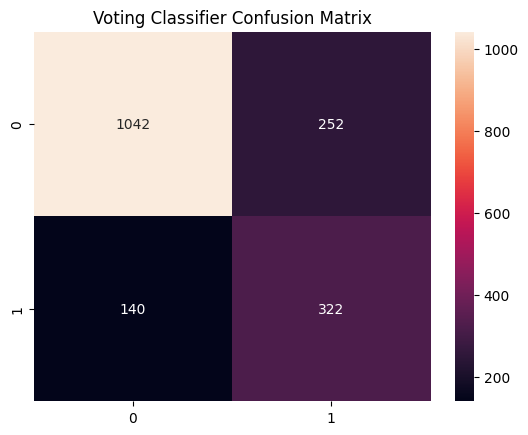

In [32]:
# Treinamento do pipeline
model_pipeline.fit(X_train, y_train)

# Realização de previsões no conjunto de teste
predictions = model_pipeline.predict(X_test)

# Avaliação do desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print("Voting Classifier - Final Accuracy Score: ", accuracy)
print(classification_report(y_test, predictions))

# Visualização da matriz de confusão
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")
plt.title("Voting Classifier Confusion Matrix")
plt.show()

In [33]:
# Armazenar as métricas de desempenho
scores = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, scores)
pr_auc = auc(recall, precision)

model_metrics['Voting Classifier'] = {
    'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc,
    'precision': precision, 'recall': recall, 'pr_auc': pr_auc
}

# Salvar o modelo treinado
trained_models['Voting Classifier'] = model_pipeline
joblib.dump(model_pipeline, 'Voting_Classifier_model.pkl')

['Voting_Classifier_model.pkl']

### Análise do Resultado
- **Acurácia de 0.78**: Mostra um desempenho geralmente bom em classificar corretamente os casos de churn e não churn.
- **Precisão para a classe 1 (churn) de 0.56**: Este valor indica que quando o modelo prevê churn, ele está correto 56% das vezes. Ainda há espaço para melhoria, considerando o impacto de falsos positivos em ações de retenção de clientes.
- **Recall para a classe 1 de 0.70**: Isso sugere que o modelo é capaz de identificar 70% de todos os verdadeiros casos de churn, o que é bastante positivo, pois captura uma grande maioria dos clientes em risco.


##3.4 Validação Cruzada Detalhada
Nesta seção, exploramos a robustez e a confiabilidade dos modelos através da técnica de validação cruzada.

In [34]:
# Validação cruzada para cada modelo após avaliação detalhada
cv_results = {}
for name, model_pipeline in trained_models.items():
    scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"Validação Cruzada para {name}: Média da Acurácia = {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Validação Cruzada para KNN: Média da Acurácia = 0.70 (+/- 0.02)
Validação Cruzada para SVC: Média da Acurácia = 0.76 (+/- 0.02)
Validação Cruzada para Random Forest: Média da Acurácia = 0.78 (+/- 0.03)
Validação Cruzada para Logistic Regression: Média da Acurácia = 0.75 (+/- 0.02)
Validação Cruzada para Decision Tree: Média da Acurácia = 0.72 (+/- 0.02)
Validação Cruzada para AdaBoost: Média da Acurácia = 0.77 (+/- 0.03)
Validação Cruzada para Gradient Boosting: Média da Acurácia = 0.79 (+/- 0.02)
Validação Cruzada para Voting Classifier: Média da Acurácia = 0.78 (+/- 0.03)


Os resultados da validação cruzada em comparação com as acurácias diretas dos modelos mostram uma tendência interessante. Enquanto as acurácias diretas e as médias da validação cruzada estão bem alinhadas para a maioria dos modelos, como SVC, Random Forest e Logistic Regression, isso indica uma boa generalização. O Gradient Boosting e o Voting Classifier se destacam com acurácias consistentemente altas em ambos os métodos, ressaltando sua robustez. O KNN e o Decision Tree, por outro lado, apresentam uma pequena queda nas médias da validação cruzada, o que sugere uma sensibilidade maior à variação dos dados de treinamento. Essa análise ajuda a entender quais modelos são mais confiáveis para uso prático, baseando-se na estabilidade de suas performances.

#4. Avaliação de Resultados:

Nesta fase final de nossa análise, abordamos uma comparação abrangente entre modelos individuais e uma abordagem de ensemble utilizando o Voting Classifier. Cada modelo, incluindo o ensemble, é avaliado rigorosamente através de uma série de procedimentos para determinar sua eficácia e capacidade de generalização. Utilizamos o GridSearchCV para identificar os melhores parâmetros para cada modelo e, subsequentemente, examinamos a robustez de cada um ao calcular suas pontuações no conjunto de treinamento e de teste. Esta etapa é crucial para identificar possíveis problemas de overfitting e escolher o modelo que oferece o melhor equilíbrio entre precisão e capacidade de generalização.

##4.1. Avaliação de Modelos com Curva ROC
Este bloco de código é responsável por gerar e exibir a curva Receiver Operating Characteristic (ROC) para cada modelo. A curva ROC é uma ferramenta gráfica crucial para visualizar a performance dos modelos em termos de taxa de verdadeiros positivos contra a taxa de falsos positivos.

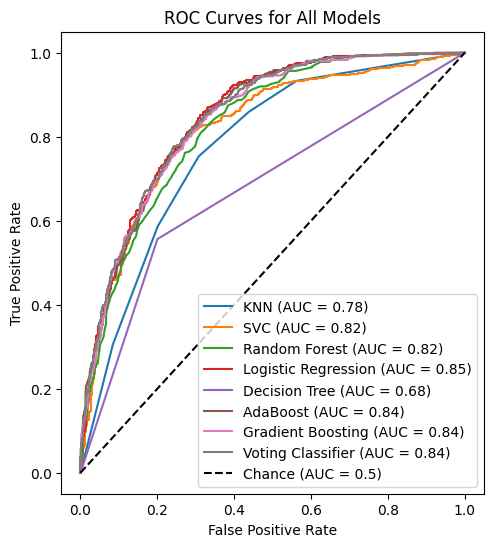

In [35]:
plt.figure(figsize=(12, 6))

# Subplot para a Curva ROC
plt.subplot(1, 2, 1)
for name, metrics in model_metrics.items():
    plt.plot(metrics['fpr'], metrics['tpr'], label=f'{name} (AUC = {metrics["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")

##4.1.2. Avaliação de Modelos com Curva Precision-Recall


Este bloco de código é destinado a calcular e exibir a curva Precision-Recall para cada modelo. Esta curva é importante para avaliar a precisão dos modelos em relação à taxa de recuperação (recall), especialmente em contextos de classes desbalanceadas.

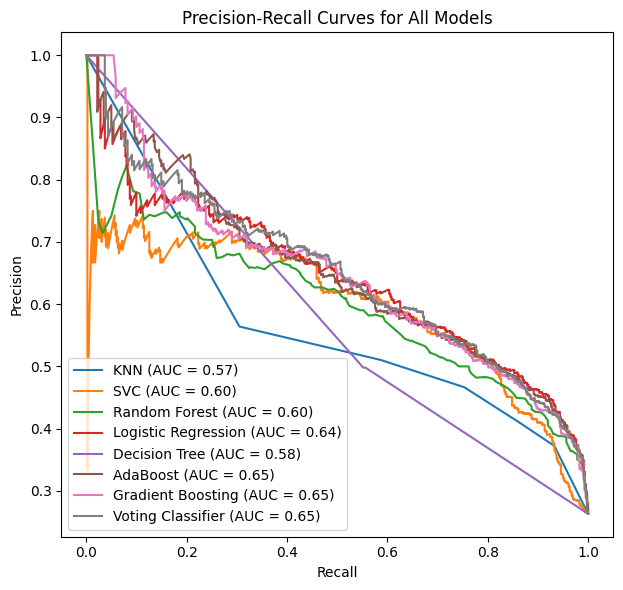

In [36]:
plt.figure(figsize=(12, 6))

# Subplot para a Curva Precision-Recall
plt.subplot(1, 2, 2)
for name, metrics in model_metrics.items():
    plt.plot(metrics['recall'], metrics['precision'], label=f'{name} (AUC = {metrics["pr_auc"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

##4.2. Análise final
Nesta fase final de nossa análise, incorporamos uma abordagem de conjunto ao nosso conjunto de modelos através da adição do Voting Classifier. Este método combina as previsões de múltiplos modelos de aprendizado de máquina para formar uma previsão final baseada na votação mais precisa e confiável entre os classificadores selecionados

Identificando os melhores parâmetros:

In [37]:
#Execução do GridSearchCV
grid_search_results = {}
for name, model in models.items():
    param_grid = parameters.get(name, {})
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    grid_search_results[name] = grid_search
    print(f"{name}: Melhores Parâmetros: {grid_search.best_params_} com score {grid_search.best_score_:.2f}")

KNN: Melhores Parâmetros: {'n_neighbors': 11} com score 0.78
SVC: Melhores Parâmetros: {'C': 10} com score 0.76
Random Forest: Melhores Parâmetros: {'n_estimators': 100} com score 0.79
Logistic Regression: Melhores Parâmetros: {'C': 1} com score 0.81
Decision Tree: Melhores Parâmetros: {'max_depth': 10} com score 0.75
AdaBoost: Melhores Parâmetros: {'n_estimators': 50} com score 0.80
Gradient Boosting: Melhores Parâmetros: {'n_estimators': 100} com score 0.80
Voting Classifier: Melhores Parâmetros: {} com score 0.80


In [38]:
#Análise de Resultados e Overfitting
best_models = {}
for name, grid in grid_search_results.items():
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)
    overfitting = train_score - test_score
    best_models[name] = {
        'model': grid.best_estimator_,
        'train_score': train_score,
        'test_score': test_score,
        'overfitting': overfitting
    }
    print(f"{name} - Treino: {train_score:.2f}, Teste: {test_score:.2f}, Overfitting: {overfitting:.2f}")

KNN - Treino: 0.81, Teste: 0.77, Overfitting: 0.05
SVC - Treino: 0.78, Teste: 0.78, Overfitting: 0.00
Random Forest - Treino: 1.00, Teste: 0.79, Overfitting: 0.21
Logistic Regression - Treino: 0.81, Teste: 0.80, Overfitting: 0.01
Decision Tree - Treino: 0.89, Teste: 0.76, Overfitting: 0.13
AdaBoost - Treino: 0.81, Teste: 0.79, Overfitting: 0.02
Gradient Boosting - Treino: 0.83, Teste: 0.80, Overfitting: 0.04
Voting Classifier - Treino: 0.90, Teste: 0.80, Overfitting: 0.09


In [39]:
#Identificação e Descrição do Melhor Modelo
best_model_name = max(best_models, key=lambda k: best_models[k]['test_score'])
best_model = best_models[best_model_name]
estimators_details = ', '.join([f"{name}: {type(est).__name__}" for name, est in best_model['model'].estimators])

print(f"O melhor modelo foi {best_model_name} com um score de teste de {best_model['test_score']:.2f}.")
print("Detalhes do modelo:")
print(f"Voting Strategy: {best_model['model'].voting}")
print(f"Estimators: {estimators_details}")

O melhor modelo foi Voting Classifier com um score de teste de 0.80.
Detalhes do modelo:
Voting Strategy: soft
Estimators: gbc: GradientBoostingClassifier, lr: LogisticRegression, rf: RandomForestClassifier


##4.3. Descrição Detalhada da Melhor Solução:

---

Após uma análise meticulosa e comparação entre diversos modelos de aprendizado de máquina aplicados ao nosso conjunto de dados, o Voting Classifier emergiu como a melhor solução para o problema de previsão de churn em nossa aplicação. Este modelo, que integra as previsões de três algoritmos distintos—Gradient Boosting Classifier, Logistic Regression e Random Forest—, demonstrou um equilíbrio notável entre robustez e precisão, com um score de teste de 0.80.

O Voting Classifier se destaca pela sua capacidade de combinar diferentes metodologias de modelagem, o que potencializa a captura de padrões complexos nos dados que podem ser negligenciados por um único modelo. Cada um dos componentes do Voting Classifier traz uma perspectiva única para a análise, onde:
- **Gradient Boosting Classifier** explora as relações sequenciais entre erros para aprimorar a precisão.
- **Logistic Regression** oferece um modelo linear robusto que é eficaz em capturar tendências lineares simples.
- **Random Forest** agrega múltiplas árvores de decisão para reduzir o risco de overfitting e melhorar a generalização para dados não vistos.

Esta abordagem combinada permite que o Voting Classifier mantenha uma performance sólida mesmo diante das variáveis complexas e interações presentes no dataset, proporcionando uma solução confiável e eficaz para prever churn.

### Comparação com Logistic Regression

Por outro lado, a Logistic Regression também apresentou resultados impressionantes, com uma acurácia no conjunto de teste de 0.80 e um indicativo de overfitting quase nulo (0.01), indicando uma excelente generalização. A Regressão Logística é conhecida por sua simplicidade e eficácia, sendo especialmente útil em cenários onde a relação entre as variáveis independentes e a variável dependente é aproximadamente linear.

A proximidade nos resultados de teste entre o Voting Classifier e a Logistic Regression suscita uma análise criteriosa. Enquanto a Regressão Logística oferece uma implementação mais direta e potencialmente mais interpretable, o Voting Classifier traz uma robustez adicional ao considerar múltiplas perspectivas. Esta robustez é crucial em cenários práticos onde a distribuição dos dados pode variar, e a capacidade de adaptação do modelo é fundamental.

### Conclusão

Embora a Logistic Regression tenha mostrado uma performance quase isenta de overfitting, optamos pelo Voting Classifier como a melhor solução devido à sua robustez aprimorada e habilidade em lidar com a complexidade dos dados de maneira eficiente. A escolha reflete a necessidade de um modelo que não apenas performe bem em condições ideais, mas que também possa manejar as incertezas e variações inerentes a dados do mundo real. Portanto, o Voting Classifier é recomendado como a solução ideal para prever churn, oferecendo um equilíbrio entre precisão, generalização e robustez, preparando o terreno para estratégias de retenção de clientes mais eficazes e informadas.
